In [20]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/churn_customers.csv')


In [3]:
df.head()

,customerID,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,CUST0001,Female,0,56,Yes,Yes,Fiber optic,No,Yes,No,No,No internet service,Yes,Two year,No,Credit card (automatic),45.96,2529.15,No
1,CUST0002,Female,0,19,No,Yes,No,No internet service,No,No,No,No internet service,Yes,One year,Yes,Credit card (automatic),35.09,689.20,No
2,CUST0003,Female,0,29,Yes,No,Fiber optic,No,Yes,No,No,No internet service,No,Month-to-month,Yes,Bank transfer (automatic),100.43,2880.70,No
3,CUST0004,Male,1,51,Yes,No,No,No internet service,No internet service,Yes,Yes,Yes,No,Two year,No,Electronic check,88.78,4563.37,Yes
4,CUST0005,Male,1,21,No,Yes,No,No internet service,No internet service,No internet service,Yes,No,No,Month-to-month,No,Electronic check,82.71,1756.91,No


In [6]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0


In [25]:
df = df.drop(columns=['customerID'])

In [26]:
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['gender', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object')

In [27]:
num_col = df.select_dtypes(exclude='object').columns
num_col


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

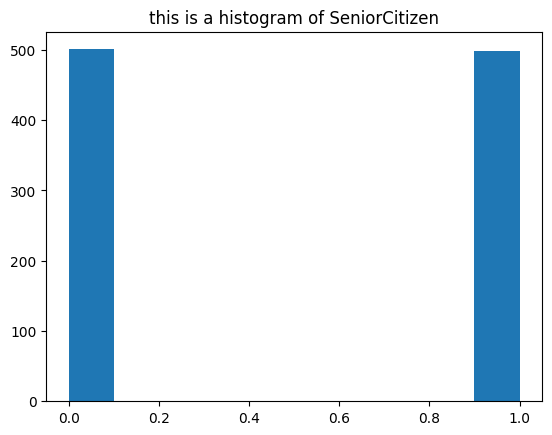

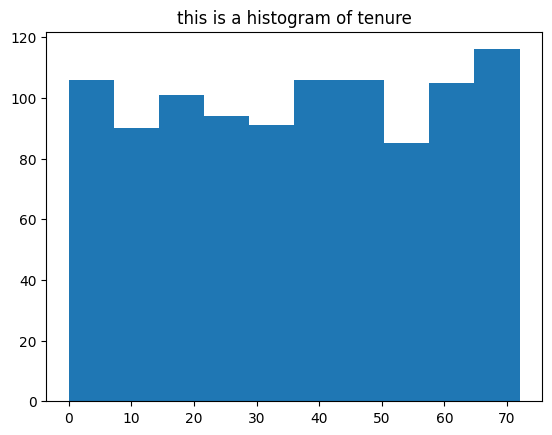

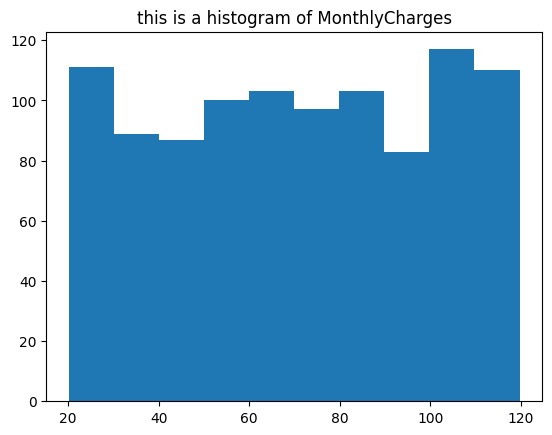

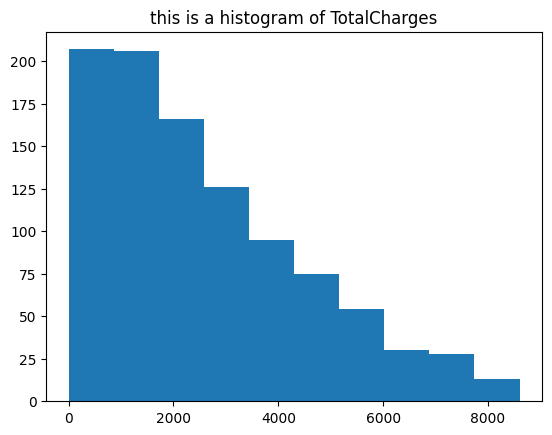

In [28]:
for col in num_col:
  plt.figure()
  plt.hist(df[col])
  plt.title(f'this is a histogram of {col}')
  plt.show()

In [43]:
encoded = ColumnTransformer(
    transformers=[
        ('numeric', 'passthrough', num_col),
        ('categorical', Pipeline(
            steps = [
                ('impute', SimpleImputer(strategy='most_frequent')),
                ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
            ]), cat_col),
    ],
)
encoded

ColumnTransformer(transformers=[('numeric', 'passthrough',
                                 Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],
      dtype='object'))])

In [44]:
df_encoded = encoded.fit_transform(df)
feature_name = encoded.get_feature_names_out()
df_encoded = pd.DataFrame(df_encoded, columns = feature_name)
df_encoded

,numeric__SeniorCitizen,numeric__tenure,numeric__MonthlyCharges,numeric__TotalCharges,categorical__gender_Male,categorical__PhoneService_Yes,categorical__MultipleLines_No phone service,categorical__MultipleLines_Yes,categorical__InternetService_Fiber optic,categorical__InternetService_No,...,categorical__StreamingTV_Yes,categorical__StreamingMovies_No internet service,categorical__StreamingMovies_Yes,categorical__Contract_One year,categorical__Contract_Two year,categorical__PaperlessBilling_Yes,categorical__PaymentMethod_Credit card (automatic),categorical__PaymentMethod_Electronic check,categorical__PaymentMethod_Mailed check,categorical__Churn_Yes
0,0.0,56.0,45.96,2529.15,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,19.0,35.09,689.20,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,29.0,100.43,2880.70,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,51.0,88.78,4563.37,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,21.0,82.71,1756.91,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,13.0,106.55,1397.65,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,71.0,90.13,6354.06,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
997,1.0,4.0,110.84,467.30,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
998,1.0,25.0,69.60,1693.78,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [47]:
target_cols = df_encoded.columns[-1]
target_cols
df_encoded.rename(columns={target_cols: 'Churn'}, inplace=True)
df_encoded

,numeric__SeniorCitizen,numeric__tenure,numeric__MonthlyCharges,numeric__TotalCharges,categorical__gender_Male,categorical__PhoneService_Yes,categorical__MultipleLines_No phone service,categorical__MultipleLines_Yes,categorical__InternetService_Fiber optic,categorical__InternetService_No,...,categorical__StreamingTV_Yes,categorical__StreamingMovies_No internet service,categorical__StreamingMovies_Yes,categorical__Contract_One year,categorical__Contract_Two year,categorical__PaperlessBilling_Yes,categorical__PaymentMethod_Credit card (automatic),categorical__PaymentMethod_Electronic check,categorical__PaymentMethod_Mailed check,Churn
0,0.0,56.0,45.96,2529.15,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,19.0,35.09,689.20,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,29.0,100.43,2880.70,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,51.0,88.78,4563.37,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,1.0,21.0,82.71,1756.91,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,13.0,106.55,1397.65,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
996,1.0,71.0,90.13,6354.06,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
997,1.0,4.0,110.84,467.30,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
998,1.0,25.0,69.60,1693.78,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0


In [48]:
df_encoded.describe(

)

,numeric__SeniorCitizen,numeric__tenure,numeric__MonthlyCharges,numeric__TotalCharges,categorical__gender_Male,categorical__PhoneService_Yes,categorical__MultipleLines_No phone service,categorical__MultipleLines_Yes,categorical__InternetService_Fiber optic,categorical__InternetService_No,...,categorical__StreamingTV_Yes,categorical__StreamingMovies_No internet service,categorical__StreamingMovies_Yes,categorical__Contract_One year,categorical__Contract_Two year,categorical__PaperlessBilling_Yes,categorical__PaymentMethod_Credit card (automatic),categorical__PaymentMethod_Electronic check,categorical__PaymentMethod_Mailed check,Churn
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.499000,36.62000,70.803930,2601.241360,0.524000,0.499000,0.356000,0.30700,0.305000,0.351000,...,0.32800,0.335000,0.325000,0.316000,0.334000,0.498000,0.239000,0.271000,0.273000,0.288000
std,0.500249,21.15072,29.306965,1966.569281,0.499674,0.500249,0.479055,0.46148,0.460638,0.477522,...,0.46972,0.472227,0.468609,0.465146,0.471876,0.500246,0.426686,0.444699,0.445724,0.453058
min,0.000000,0.00000,20.130000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.00000,45.927500,1038.455000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,37.00000,70.700000,2095.315000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,55.00000,96.767500,3850.207500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,72.00000,119.750000,8601.450000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']
X.head()
y.head()

,Churn
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0


In [54]:
from sklearn.linear_model import LogisticRegression
lr_machine = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
lr_machine.fit(X_train, y_train)
y_pred = lr_machine.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.99      0.81       136
         1.0       0.00      0.00      0.00        64

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [57]:
correlation = df_encoded.corrwith(df_encoded['Churn']).sort_values(ascending=False)
correlation

,0
Churn,1.000000
categorical__gender_Male,0.044607
categorical__DeviceProtection_Yes,0.041235
categorical__Contract_One year,0.028462
categorical__PhoneService_Yes,0.027772
categorical__DeviceProtection_No internet service,0.027770
categorical__OnlineBackup_Yes,0.026395
categorical__StreamingMovies_Yes,0.025460
categorical__TechSupport_No internet service,0.024076
categorical__PaperlessBilling_Yes,0.020211
